In [112]:
# uncomment these lines to install the required dependencies.
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn

# Übung 2: K-Nearest Neighbor Classification

In dieser Übung werden Sie

* einen **K-Nearest Neighbor** (KNN) Classifier implementieren
* den KNN auf ein lineares und ein nichtlineares Klassifikationsproblem anwenden
* den Hyperparameter $k$ optimieren
* den Trainings- und Validierungsfehler auswerten

In [113]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons, make_blobs
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

np.random.seed(0)

### Plot Function

In [114]:
def plot_data_and_model_predictions(X_train, y_train, X_test, y_test, model=None, ax=None):
    if not ax:
        fig, ax = plt.subplots(1, 1)
    if model:
        # Plot the decision boundary.
        h = .1 # stepsize in mesh
        offset = .1
        x_min, x_max = np.vstack([X_train, X_test])[:, 0].min() - offset, np.vstack([X_train, X_test])[:, 0].max() + offset
        y_min, y_max = np.vstack([X_train, X_test])[:, 1].min() - offset, np.vstack([X_train, X_test])[:, 1].max() + offset
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = ax.contourf(xx, yy, Z, cmap=plt.cm.cividis, alpha=.6)

    ax.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 'b.', label='Class 0 Train')
    ax.plot(X_test[y_test == 0, 0], X_test[y_test == 0, 1], 'bo', label='Class 0 Test')
    ax.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 'r.', label='Class 1 Train')
    ax.plot(X_test[y_test == 1, 0], X_test[y_test == 1, 1], 'ro', label='Class 1 Test')

    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')
    ax.set_aspect(1)
    ax.legend()

## Generierung von Beispieldaten

Erzeuge 2 Beispieldatensätze, linear und nicht-linear, mit Hilfe der scikit-learn Bibliothek

Text(0.5, 1.0, 'Nonlinear Data')

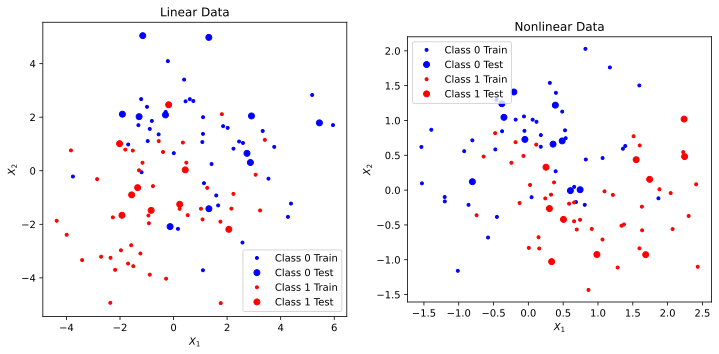

In [115]:
n_samples = 100

X_nonlinear, y_nonlinear = make_moons(n_samples=n_samples, noise=.5, random_state=0)
X_linear, y_linear = make_blobs(n_samples=n_samples, 
                                n_features=2, 
                                centers=np.array([[1,1],[-1,-1]]), 
                                cluster_std=[2.,2.],
                                random_state=4)

test_size = .2
linear_data = X_linear_train, X_linear_test, y_linear_train, y_linear_test = train_test_split(
    X_linear, y_linear, test_size=test_size)

nonlinear_data = X_nonlinear_train, X_nonlinear_test, y_nonlinear_train, y_nonlinear_test = train_test_split(
    X_nonlinear, y_nonlinear, test_size=test_size)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
plot_data_and_model_predictions(X_linear_train, y_linear_train, X_linear_test, y_linear_test, ax=ax1)
plot_data_and_model_predictions(X_nonlinear_train, y_nonlinear_train, X_nonlinear_test, y_nonlinear_test, ax=ax2)
ax1.set_title('Linear Data')
ax2.set_title('Nonlinear Data')

## KNN Classifier Implementierung

Implementieren Sie die fehlenden Code-Stellen, gekennzeichnet durch `INSERT CODE HERE`, um die `KNNClassifier`-Klasse zu vervollständigen.

   1. Implementieren Sie die Funktion fit, um den KNN-Classifier zu trainieren (die Daten zu speichern)! (10%)
   2. Implementieren Sie die Funktion predict, die Vorhersagen/Klassifizierungen für neue Daten vornimmt! (90%)


In [116]:
from scipy import stats

class KNNClassifier:
    """
    Multi-Class Implementation of the K-Nearest Neighbor (KNN) Classifier
    Assigns the most common label of the `self.k` nearest training data points to classify a new data point.

    Attributes:
        k (int): number of neighbors to consider
        X (numpy.ndarray): 2D training data matrix (columns->features, rows->samples)
        y (numpy.ndarray): 1D training labels vector. classes are integegers, starting from zero: 0, 1, 2 ...
    """
    def __init__(self, k=3):
        """
        Args:
            k (int): number of neighbors to consider
        """
        self.k = k
        self.X = None
        self.y = None
        
    def fit(self, X_train, y_train):
        """
        Stores the training data (features and labels) in the classifier.
        
        Args:
            X_train (numpy.ndarray): 2D training data matrix (columns->features, rows->samples)
            y_train (numpy.ndarray): 1D training labels vector. classes are integers, starting from zero: 0, 1, 2 ..
        
        Returns:
            None
        """
        if X_train.size == 0:
            raise ValueError("data matrix is empty")
        if len(X_train) != len(y_train):
            raise ValueError(f"number of training samples ({len(X_train)}) does not match number of labels ({len(y_train)})")
        self.X = X_train.copy()
        self.y = y_train.copy()
        
    def predict(self, X_test):
        """
        Perform K-Nearest Neighbor (KNN) Classification and obtain predicted labels
        
        Args:
            X_test (numpy.ndarray): 2D test data matrix (columns->features, rows->samples)
        
        Returns:
            numpy.ndarray: vector of predicted labels (integer)
        """
        if self.X is None or self.y is None:
            raise ValueError("Classifier is not fitted, please call `self.fit` first!")
        y_pred = np.zeros(X_test.shape[0])
        for idx, x in enumerate(X_test):
            k_neighbors = np.linalg.norm(self.X - x, axis=1).argsort()[:self.k]
            y_pred[idx] = np.bincount(self.y[k_neighbors]).argmax()
        return y_pred
    
    # Alternative ohne for-loops
    def predict(self, X_test):
        """
        Perform K-Nearest Neighbor (KNN) Classification and obtain predicted labels
        
        Args:
            X_test (numpy.ndarray): 2D test data matrix (columns->features, rows->samples)
        
        Returns:
            numpy.ndarray: vector of predicted labels (integer)
        """
        if self.X is None or self.y is None:
            raise ValueError("Classifier is not fitted, please call `self.fit` first!")
        norm = np.sum(np.square(self.X[:, np.newaxis, :] - X_test), axis=2)
        neighbors = self.y[norm.argsort(axis=0)[:self.k]]
        y_pred = stats.mode(neighbors, axis=0, keepdims=True).mode
        # Alternative ohne scipy für mode berechnung
        # y_pred = (neighbors.T[:, :, np.newaxis] == np.sort(np.unique(self.y))).sum(axis=1).argmax(axis=1)
        return y_pred


# Überprüfung

Im folgenden Code werden mehrere `KNNClassifier` auf verschiedenen Datensätzen trainiert und getestet. Wenn Ihre Implementierung stimmt, dann sollten Sie die Plots reproduzieren können!

## Kassifizierung der linearen Beispieldaten:

Text(0.5, 1.0, 'k=10; accuracy: 0.8')

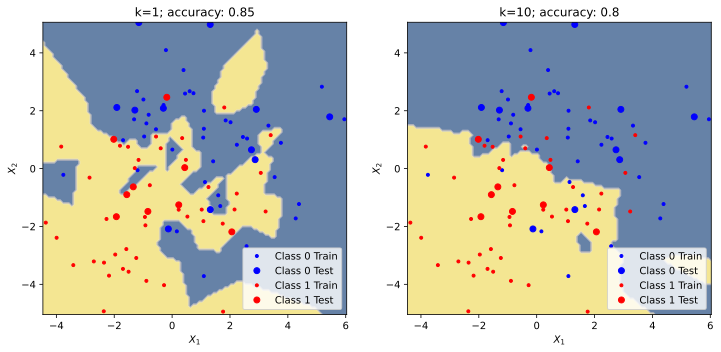

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

knn = KNNClassifier(k=1)
knn.fit(X_linear_train, y_linear_train)
plot_data_and_model_predictions(X_linear_train, y_linear_train, X_linear_test, y_linear_test,
                                model=knn, ax=ax1)
y_linear_test_pred = knn.predict(X_linear_test)
ax1.set_title(f'k=1; accuracy: {(y_linear_test==y_linear_test_pred).mean():0.2}')

knn = KNNClassifier(k=10)
knn.fit(X_linear_train, y_linear_train)
plot_data_and_model_predictions(X_linear_train, y_linear_train, X_linear_test, y_linear_test,
                                model=knn, ax=ax2)
y_linear_test_pred = knn.predict(X_linear_test)
ax2.set_title(f'k=10; accuracy: {(y_linear_test==y_linear_test_pred).mean():0.2}')

### Hyperparameter Optimization

Mit Hilfe von Grid-Search wird der optimale wert für $k$ bestimmt.

Text(0.5, 1.0, 'Linear Classification')

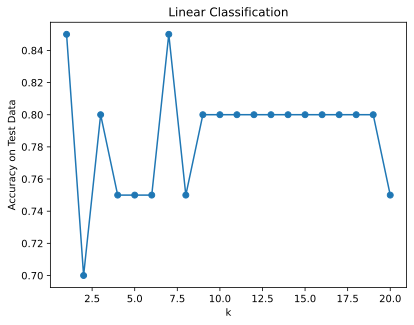

In [118]:
acc_val = []
for k in range(1, 21):
    knn = KNNClassifier(k=k)
    knn.fit(X_linear_train, y_linear_train)
    acc_val.append((k,(y_linear_test==knn.predict(X_linear_test)).mean()))

k, acc = zip(*acc_val)
plt.plot(k, acc,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy on Test Data')
plt.title('Linear Classification')

## Kassifizierung der nicht-linearen Beispieldaten:


Text(0.5, 1.0, 'k=10; accuracy: 0.9')

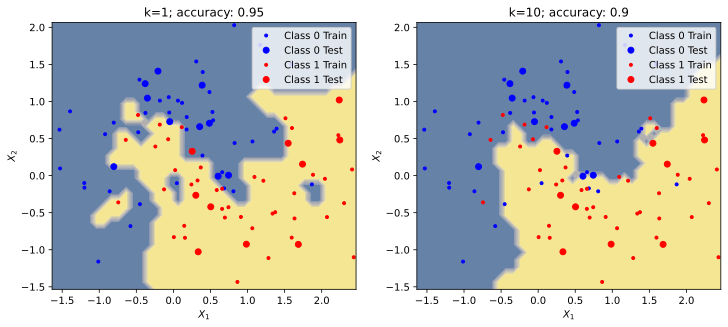

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

knn = KNNClassifier(k=1)
knn.fit(X_nonlinear_train, y_nonlinear_train)
plot_data_and_model_predictions(X_nonlinear_train, y_nonlinear_train, X_nonlinear_test, y_nonlinear_test,
                                model=knn, ax=ax1)
y_nonlinear_test_pred = knn.predict(X_nonlinear_test)
ax1.set_title(f'k=1; accuracy: {(y_nonlinear_test==y_nonlinear_test_pred).mean():0.2}')

knn = KNNClassifier(k=10)
knn.fit(X_nonlinear_train, y_nonlinear_train)
plot_data_and_model_predictions(X_nonlinear_train, y_nonlinear_train, X_nonlinear_test, y_nonlinear_test,
                                model=knn, ax=ax2)
y_nonlinear_test_pred = knn.predict(X_nonlinear_test)
plt.title(f'k=10; accuracy: {(y_nonlinear_test==y_nonlinear_test_pred).mean():0.2}')

### Hyperparameter Optimization

Mit Hilfe von Grid-Search wird der optimale wert für $k$ bestimmt.

Text(0.5, 1.0, 'Non-linear Classification')

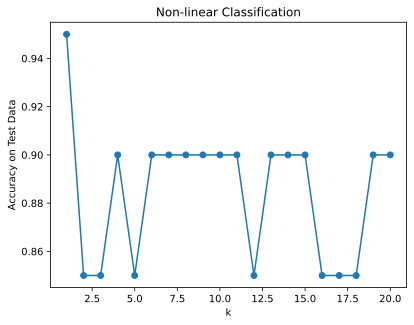

In [120]:
acc_val = []
for k in range(1, 21):
    knn = KNNClassifier(k=k)
    knn.fit(X_nonlinear_train, y_nonlinear_train)
    acc_val.append((k,(y_nonlinear_test==knn.predict(X_nonlinear_test)).mean()))

k, acc = zip(*acc_val)
plt.plot(k, acc,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy on Test Data')
plt.title('Non-linear Classification')